In [54]:
# importing related librairies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve, plot_confusion_matrix, roc_curve, mean_squared_error

In [2]:
# importing datasets
train = pd.read_csv("datasets/cleaned/data_train.csv")
test = pd.read_csv("datasets/cleaned/data_test.csv")

In [3]:
train.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
25424,52,5,318351,5,10,1,11,2,0,1,0,0,40,0,1
26800,27,2,119793,5,10,1,6,1,0,0,0,0,55,4,0
4084,28,2,407672,5,10,2,6,4,0,1,0,0,40,0,0
26886,48,0,171926,10,15,1,3,1,0,0,15024,0,50,0,1
5484,49,2,227800,8,4,1,3,1,0,0,0,0,32,0,0
31065,52,4,153312,6,12,1,12,1,0,0,0,0,40,0,1
5898,33,3,193246,0,13,1,0,1,0,0,0,0,42,0,1
12252,44,2,82601,0,13,1,7,1,0,0,0,0,40,0,0
26820,21,2,118186,5,10,0,5,3,1,1,0,0,20,0,0
20261,66,2,214469,1,9,6,0,0,0,1,0,0,13,0,0


In [4]:
test.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
9338,49,2,136358,3,14,2,5,4,4,1,0,0,20,31,0
8041,18,5,352430,2,7,0,11,3,0,0,0,1602,30,0,0
11782,60,1,54614,7,11,1,4,2,0,1,0,0,40,0,0
3057,33,2,164864,0,13,2,3,4,0,1,0,323,40,0,0
14723,48,5,136455,5,10,2,11,0,0,1,0,0,16,0,0
1341,52,0,32372,5,10,1,3,1,0,0,0,0,40,0,0
9783,21,2,301915,2,7,4,5,0,4,1,0,0,30,5,0
973,38,2,191137,12,6,1,4,1,0,0,0,0,40,0,0
951,80,2,138050,1,9,3,9,0,0,1,0,0,16,0,0
7100,52,2,257756,7,11,2,0,0,0,1,0,0,40,11,0


In [5]:
print(f"Train shape = {train.shape}")
print(f"Test shape = {test.shape}")

Train shape = (32561, 15)
Test shape = (16281, 15)


In [6]:
# describe
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561.0,2.309972,1.225728,0.0,2.0,2.0,2.0,8.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561.0,3.424465,3.453582,0.0,1.0,2.0,5.0,15.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
marital-status,32561.0,1.083781,1.251381,0.0,0.0,1.0,1.0,6.0
occupation,32561.0,4.666411,3.386119,0.0,2.0,4.0,7.0,14.0
relationship,32561.0,1.542397,1.437431,0.0,0.0,1.0,3.0,5.0
race,32561.0,0.221707,0.627348,0.0,0.0,0.0,0.0,4.0
sex,32561.0,0.330795,0.470506,0.0,0.0,0.0,1.0,1.0


In [7]:
# plot the correlation between colummns 
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), cmap="coolwarm")
plt.title('Heatmap')
plt.savefig("img/htm.png")

In [8]:
# pairplot
plt.figure(figsize=(12,10))
sns.pairplot(train.corr())
plt.title('relations')
plt.savefig("img/ppt.png")

In [9]:
# function splitting between target and feature
def sets(train, test, col):
    y1 = train[col]
    x1 = train.drop(col, axis=1)
    y2 = test[col]
    x2 = test.drop(col, axis=1)
    return x1, y1, x2, y2

In [10]:
X_train, y_train, X_test, y_test = sets(train, test, "income")

In [11]:
print(f"X train shape = {X_train.shape}")
print(f"y train shape = {y_train.shape}")
print(f"X test shape = {X_test.shape}")
print(f"y test shape = {y_test.shape}")

X train shape = (32561, 14)
y train shape = (32561,)
X test shape = (16281, 14)
y test shape = (16281,)


In [12]:
# instanciate problem
rf = RandomForestClassifier()

In [13]:
def classif(model, X_train, X_test, y_train, y_test):
    '''
    for the instanciated model,
    this function will fit train and test,
    give the score and return the y_redic
    '''
    model.fit(X_train, y_train)

    print(f"Train score = {model.score(X_train, y_train):.3f}")
    print(f"Test score = {model.score(X_test, y_test):.3f}")

    y_pred = model.predict(X_test)
    return y_pred

In [14]:
randfc = classif(rf, X_train, X_test, y_train, y_test)

Train score = 1.000
Test score = 0.854


here we have an overfit. this may be caused by the non-normalization of the dataset. the model memorized the noises instead of learning the signal.
So to come over this, lets normalize the datasets, use gridsearch and tune parameters to have the best model.

In [15]:
def norm(model, x, y):
    '''
    for a given train and test sets, this function will
    fit and transform the train set
    transform the test set
    '''
    x_norm = model.fit_transform(x)
    y_norm = model.transform(y)
    return x_norm, y_norm

In [16]:
# instanciate the model
ss = MinMaxScaler(feature_range=(0, 1))

In [17]:
X_train, X_test = norm(ss, X_train, X_test)

In [18]:
# parameters of the model
param_grid = {
    'n_estimators': [10, 20, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 7, 10],
    'min_samples_leaf': [5, 7, 10, 20],
}

In [19]:
# instanciate the model
grid = GridSearchCV(rf, param_grid=param_grid, cv=5)


In [20]:
# fit and get best models
X_train, X_test, y_train, y_test, 


AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [ ]:
# fit with grid search
grid.fit(X_train, y_train)

In [23]:
# best estimator
grid.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50)

In [24]:
model = grid.best_estimator_
model.score(X_train, y_train)

0.8652375541291729

In [25]:
model.score(X_test, y_test)


0.8601437258153676

In [26]:
# predict target
y_pred = model.predict(X_test)

In [29]:
confusion_matrix(y_test, y_pred)

array([[11899,   536],
       [ 1741,  2105]])

<Figure size 864x720 with 0 Axes>

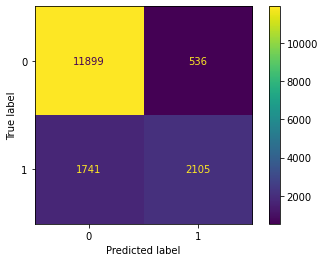

In [48]:
plt.figure(figsize=(12, 10))
plot_confusion_matrix(model, X_test, y_test)
plt.savefig('img/conf_mat.png')

In [35]:
cv = [StratifiedKFold(4), KFold(5)]
for i in cv:
    print(f"Cross val score {i} = {cross_val_score(model, X_train, y_train, cv=i)}")

Cross val score StratifiedKFold(n_splits=4, random_state=None, shuffle=False) = [0.85247513 0.85515971 0.86154791 0.85945946]
Cross val score KFold(n_splits=5, random_state=None, shuffle=False) = [0.85183479 0.85826167 0.86164005 0.8634828  0.85826167]


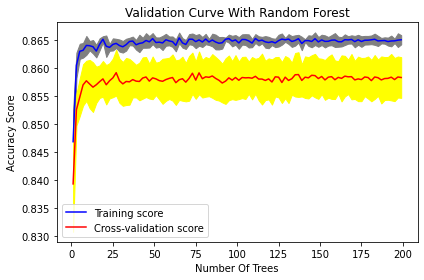

In [41]:
# validation curve and plot
param_range = np.arange(1, 200, 2)

train_scores, val_scores = validation_curve(model, X_train, y_train, param_name="n_estimators", param_range=param_range, cv=5, scoring="accuracy", n_jobs=1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(val_scores, axis=1)
test_std = np.std(val_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="yellow")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.savefig('img/val_curve.png')
plt.show()

In [55]:
# roc curve
fpr, tpr, trhd = roc_curve(y_test, y_pred)

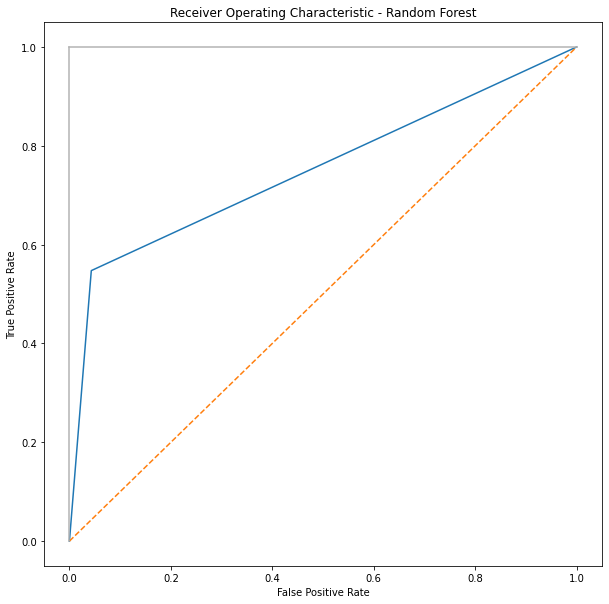

In [57]:
# Ploting ROC curves
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('img/roc.png')
plt.show()

In [69]:
print(f"MSE = {mean_squared_error(y_test, y_pred, squared=False):.3f}")
print(f"RMSE = {mean_squared_error(y_test, y_pred, squared=True):.3f}")

MSE = 0.374
RMSE = 0.140
